## SIMPLE IMPLEMENTATION OF RBF KERNEL

#### The dataset is a small collection of records of positions of certain individuals in a company.

#### The SVR model is trained on the dataset and attempts to predict the salary of an out of sample data point


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('Position_Salaries.csv')

In [3]:
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [20]:
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1:].values

In [21]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [22]:
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

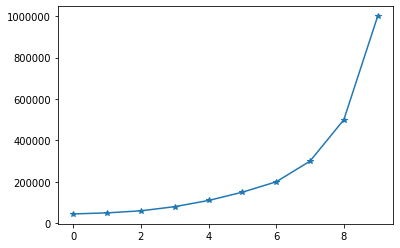

In [16]:
plt.plot(dataset['Salary'], marker = '*')

In [23]:
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
scaler_y = StandardScaler()

In [24]:
X = scaler_X.fit_transform(X) 
y = scaler_y.fit_transform(y)

In [25]:
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [26]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

In [28]:
from sklearn.svm import SVR

regressor = SVR(kernel='rbf')

In [29]:
regressor.fit(X,y)

C:\Users\sadhy\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [31]:
scaler_y.inverse_transform(regressor.predict(scaler_X.transform([[6.5]]))) # PREDICTED SALARY FOR LEVEL OF 6.5

array([170370.0204065])

In [33]:
scaler_y.inverse_transform(regressor.predict(scaler_X.transform([[11]])))

array([545576.06813303])

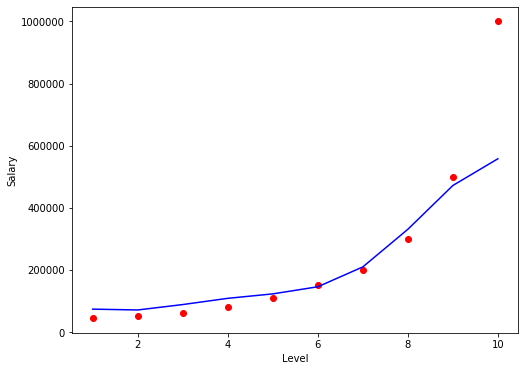

In [43]:
# Visualising the result


plt.figure(figsize = (8,6))
plt.scatter(scaler_X.inverse_transform(X), scaler_y.inverse_transform(y), c = 'red')
plt.plot( scaler_X.inverse_transform(X), scaler_y.inverse_transform(regressor.predict(X)), c = 'blue')
plt.xlabel('Level',)
plt.ylabel('Salary')
plt.show()

## THE END

